In [1]:
import sys
sys.path.append('../src')

In [2]:
from metrics import calculate_false_alarm, calculate_delay, calculate_precision, compute_metrics
from loading import *
from visualization import *
from features import *
from helpers import *

from matplotlib import pyplot as plt
%matplotlib inline

# Extract metrics for feature according to threshold value

In [3]:
data_path = "../data/"
patient_data = load_patient_seizures(data_path, 2,all_seizures=True, delta=1)

Seizure starts (s):  [[824604.12214844]
 [837451.78589844]]
Seizure ends (s):  [[824690.37769531]
 [837541.65542969]]
Duration (s):  [[86.25554687]
 [89.86953125]]
Sampled frequency (Hz):  512
Start/end [824604.12214844] [824690.37769531]
Start/end [837451.78589844] [837541.65542969]
EEG files:  [['../data/ID02/ID02_229h.mat', '../data/ID02/ID02_230h.mat', '../data/ID02/ID02_231h.mat'], ['../data/ID02/ID02_232h.mat', '../data/ID02/ID02_233h.mat', '../data/ID02/ID02_234h.mat']]
Hour of seizure:  [array([229, 230, 231]), array([232, 233, 234])]
Samples ranges:  [(104510, 148673), (1152914, 1198927)]


In [4]:
eegs = patient_data['eegs']
ranges = patient_data['ranges']
seizure_start_s = patient_data["infos"]["seizure_start"]
seizure_end_s = patient_data["infos"]["seizure_end"] 

In [5]:
max_power_eeg = top_signals(eegs, ranges, top=1, id_seizure = None)

## Convert seizure sample ranges into sliding window ranges

In [6]:
window_size = 128
step_size = 64

In [7]:
indexes = convert_sample_ranges_to_window_ranges(ranges,window_size,step_size,1843200)

# Computing signal energy with window

In [8]:
energy_feature_signals = calculate_feature(eegs, max_power_eeg[0], window_size, step_size, calculate_energy)

In [9]:
line_length_feature_signals = calculate_feature(eegs, max_power_eeg[0], window_size, step_size, calculate_line_length)

In [10]:
moving_avg_feature_signals = calculate_feature(eegs, max_power_eeg[0], window_size, step_size, calculate_moving_avg)

In [11]:
all_data_window_ranges, all_data_energy = merge_all_data(energy_feature_signals, indexes)
all_data_window_ranges, all_data_line_length = merge_all_data(line_length_feature_signals, indexes)
all_data_window_ranges, all_data_moving_avg = merge_all_data(moving_avg_feature_signals, indexes)

## Plotting the results

### Energy feature

[]

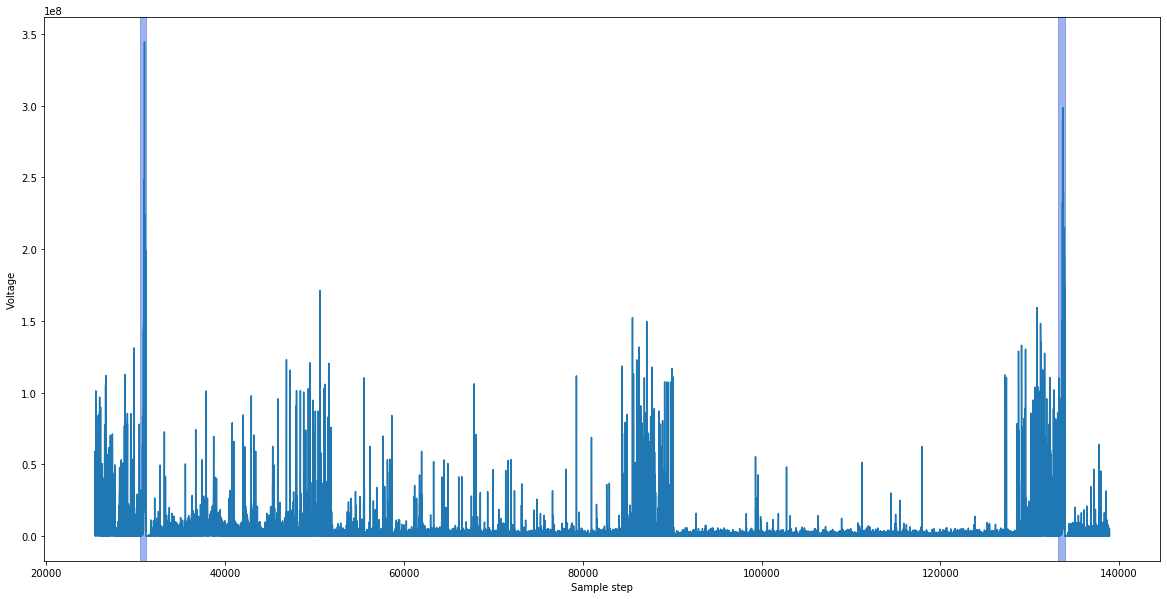

In [12]:
plot_one_signal(all_data_energy , all_data_window_ranges, 10000)

### Line length feature

[]

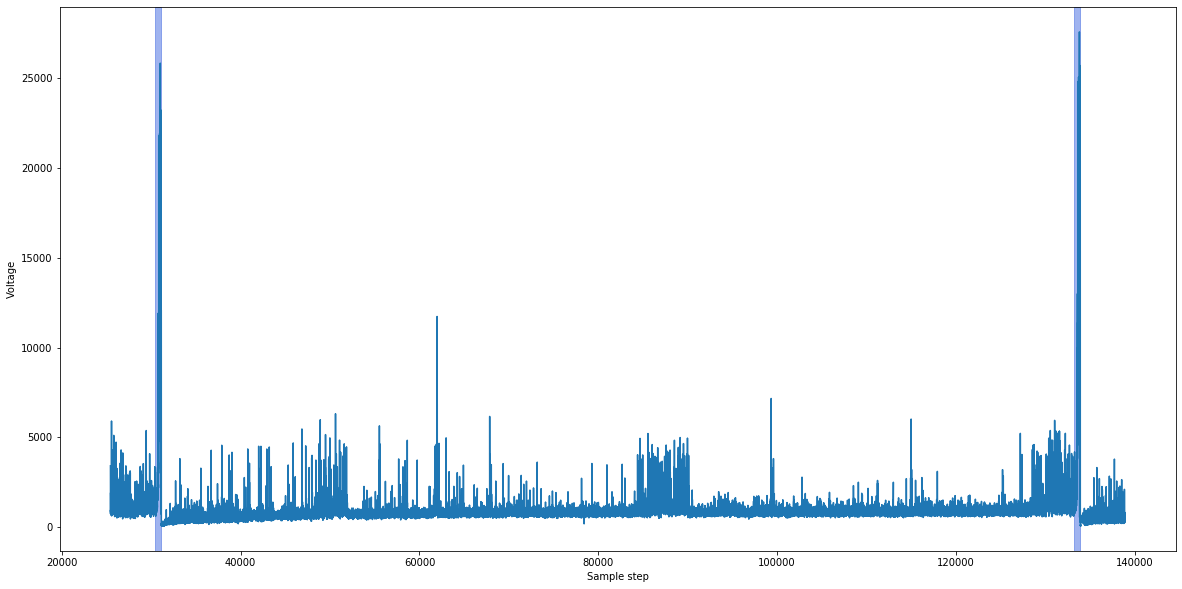

In [13]:
plot_one_signal(all_data_line_length , all_data_window_ranges, 10000)

### Moving AVG feature

[]

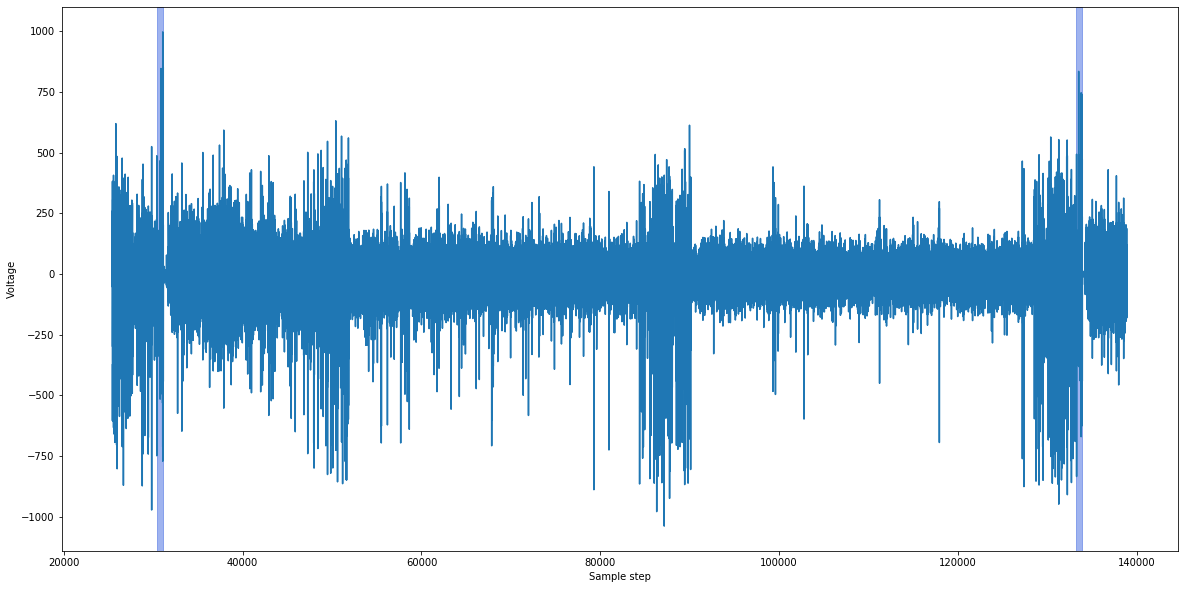

In [14]:
plot_one_signal(all_data_moving_avg , all_data_window_ranges, 10000)

# Plotting real signal and computed energy signal

In [15]:
energy_seizure1_single = energy_feature_signals[0][1]
energy_seizure1_single_scaled = scale_signal(energy_seizure1_single, 128, 64)

In [16]:
line_length_seizure1_single = line_length_feature_signals[0][1]
line_length_seizure1_single_scaled = scale_signal(line_length_seizure1_single, 128, 64)

In [17]:
moving_avg_seizure1_single = moving_avg_feature_signals[0][1]
moving_avg_seizure1_single_scaled = scale_signal(moving_avg_seizure1_single, 128, 64)

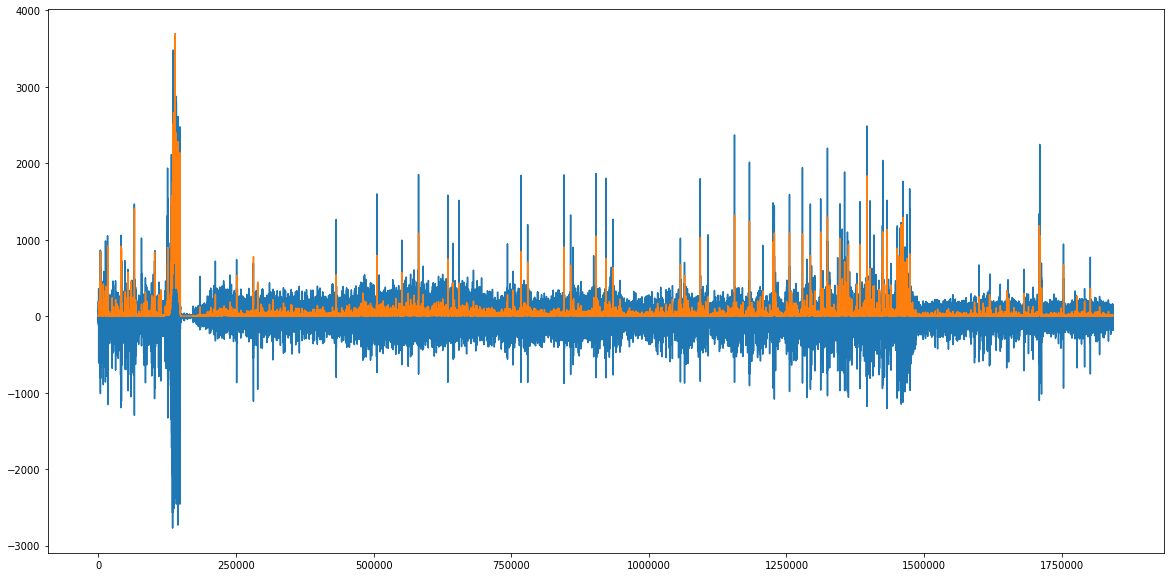

In [30]:
plt.figure(figsize=(20,10))
real_signal = eegs[0][1][max_power_eeg].T
plt.plot(real_signal)
plt.plot(energy_seizure1_single_scaled/np.max(energy_seizure1_single_scaled)*np.max(real_signal))

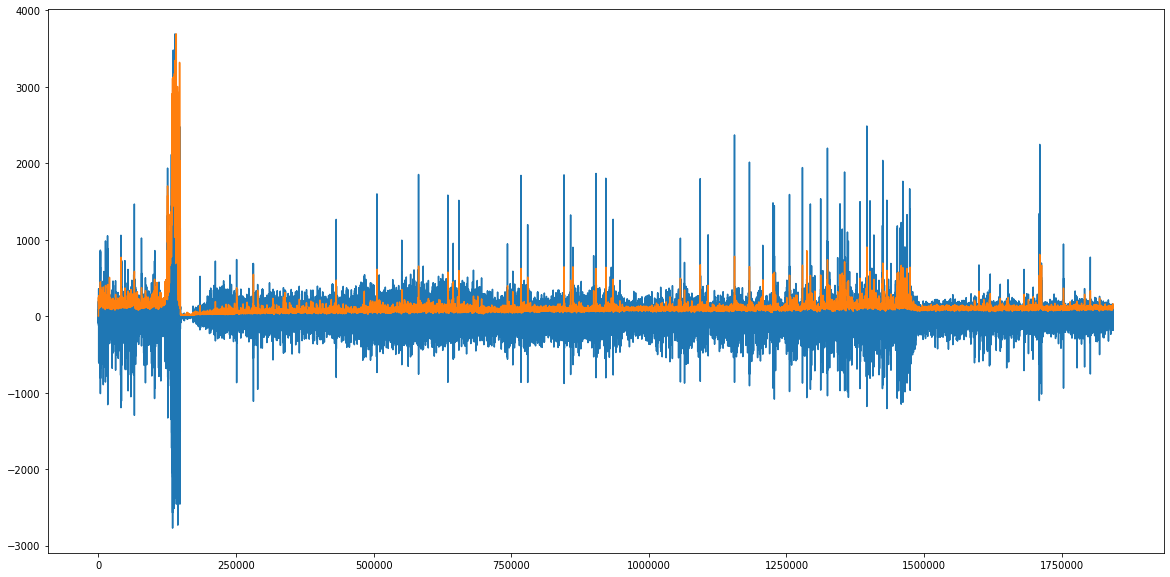

In [31]:
plt.figure(figsize=(20,10))
real_signal = eegs[0][1][max_power_eeg].T
plt.plot(real_signal)
plt.plot(line_length_seizure1_single_scaled/np.max(line_length_seizure1_single_scaled)*np.max(real_signal))

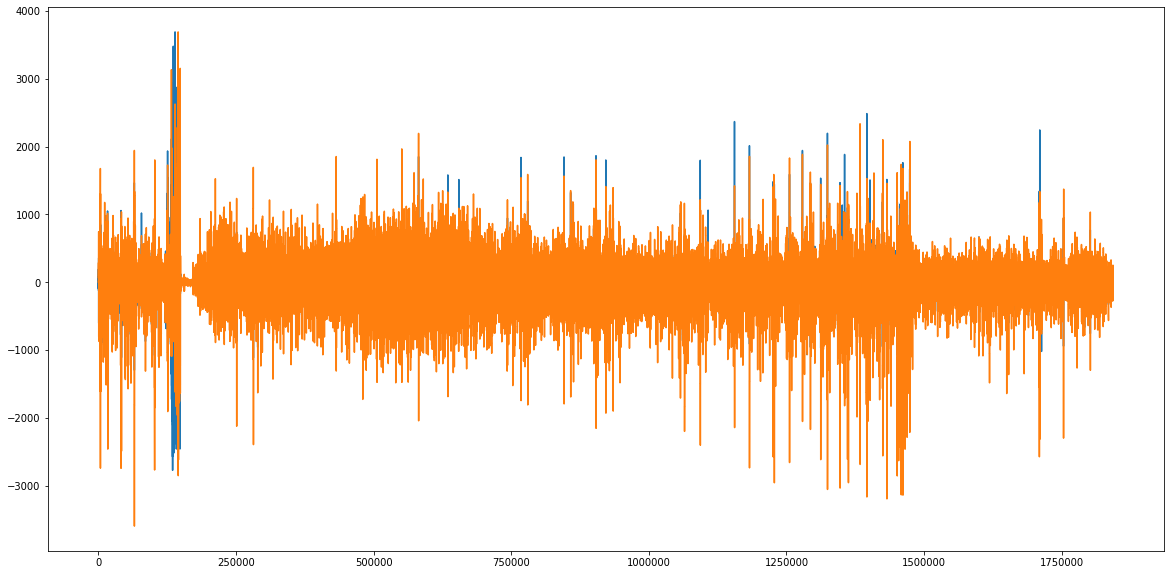

In [32]:
plt.figure(figsize=(20,10))
real_signal = eegs[0][1][max_power_eeg].T
plt.plot(real_signal)
plt.plot(moving_avg_seizure1_single_scaled/np.max(moving_avg_seizure1_single_scaled)*np.max(real_signal))

# Calculate metrics according to the threshold value

# Plotting the functions

In [21]:
thresholds, false_alarms_energy, delays_energy, precisions_energy = compute_metrics(all_data_energy, all_data_window_ranges, window_size, step_size)

In [22]:
thresholds, false_alarms_line_length, delays_line_length, precisions_line_length = compute_metrics(all_data_line_length, all_data_window_ranges, window_size, step_size)

In [23]:
thresholds, false_alarms_moving_avg, delays_moving_avg, precisions_moving_avg = compute_metrics(all_data_moving_avg, all_data_window_ranges, window_size, step_size)

## Energy feature

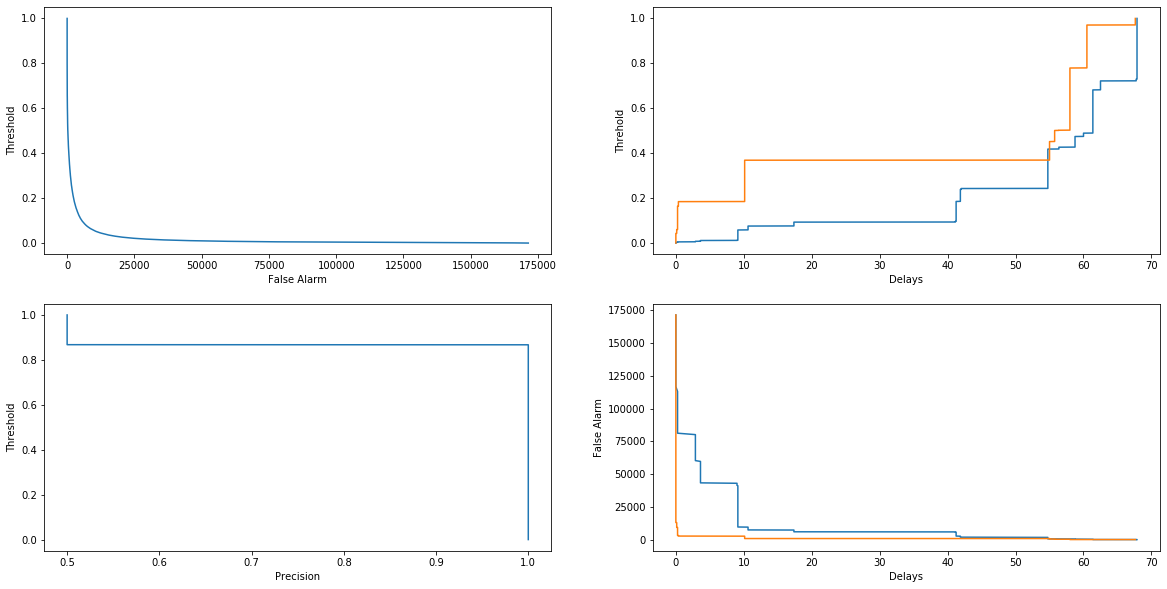

In [24]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_energy, delays_energy, precisions_energy)

## Line length feature

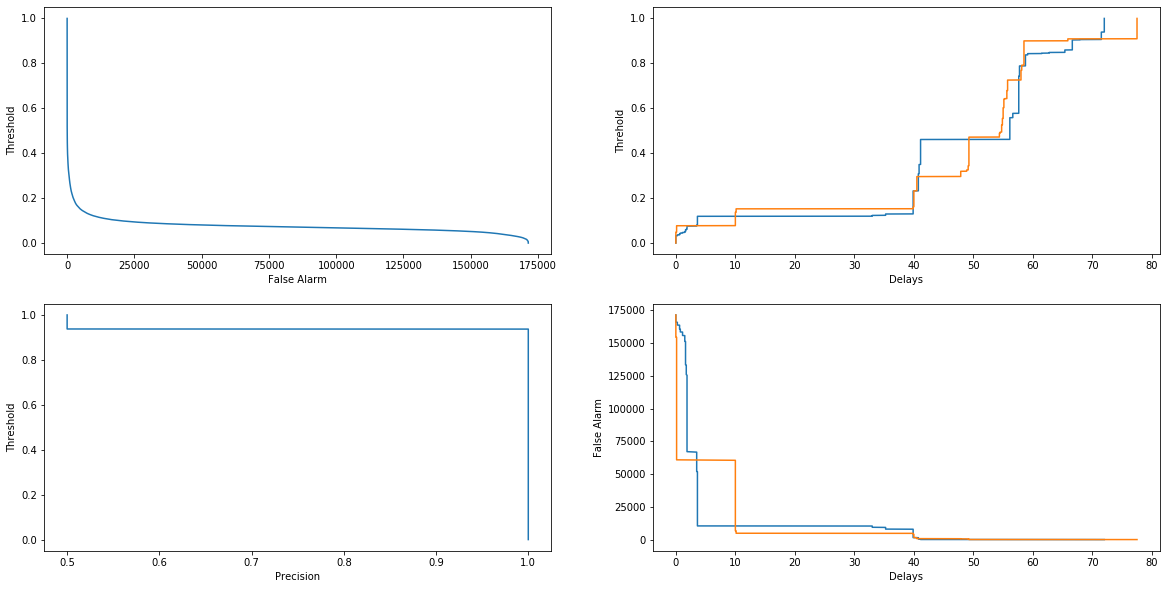

In [25]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_line_length, delays_line_length, precisions_line_length)

## Moving AVG feature

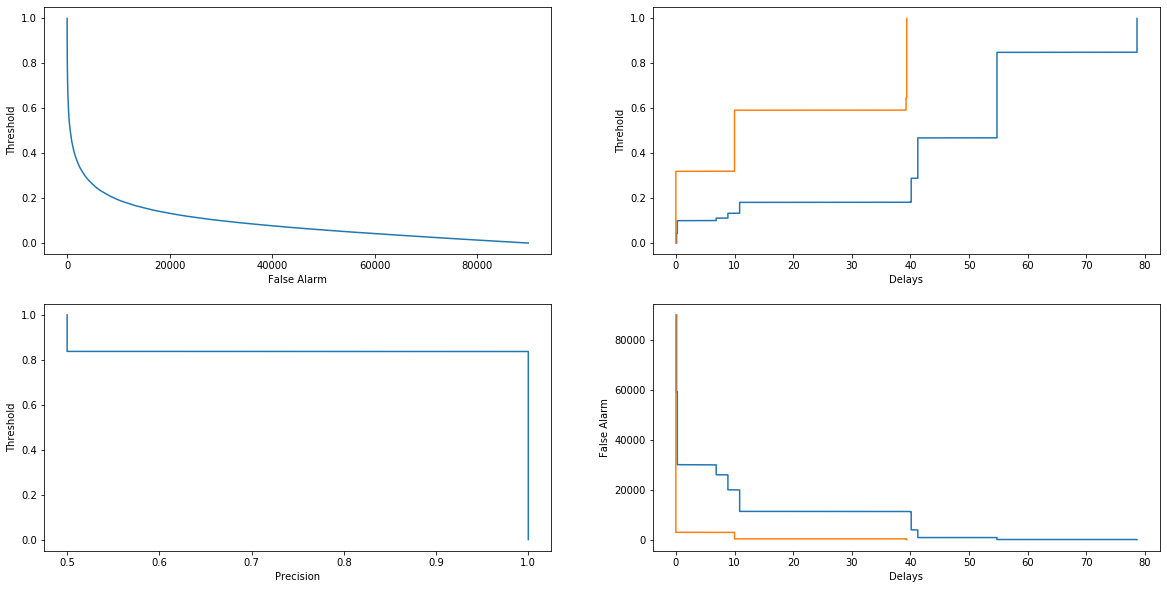

In [26]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_moving_avg, delays_moving_avg, precisions_moving_avg)